In [103]:
"""
Project Description:
    
1. First Lets understand the Customer Lifecycle in any company
    1.Customer acquisition : Bringing new customers to the business
    2.Customer early engagement: Customers are encouraged to use the services by providing different discounts and offers
    3.Cross sell and business growth: Provide them add-on services and increase in business
    4.Customer Retention: Retain the customers who are on the verge of Churning

2. Primary Goal of Project : To build a predictive model which enabling proactive retention strategy for a telecom company
    
Predicting which customers are more likely to Churn and than make some Retention strategy.
"""

'\nProject Description:\n    \n1. First Lets understand the Customer Lifecycle in any company\n    1.Customer acquisition : Bringing new customers to the business\n    2.Customer early engagement: Customers are encouraged to use the services by providing different discounts and offers\n    3.Cross sell and business growth: Provide them add-on services and increase in business\n    4.Customer Retention: Retain the customers who are on the verge of Churning\n\n2. Primary Goal of Project : To build a predictive model which enabling proactive retention strategy for a telecom company\n    \nPredicting which customers are more likely to Churn and than make some Retention strategy.\n'

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Get the data

In [3]:
df=pd.read_excel('TelcoChurn.xlsx',engine='openpyxl')

### Shape of the data

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df['customerID'].isnull().sum()

0

### Dropping the Customer ID column as it is not required for modelling 

In [8]:
df.drop('customerID',axis=1,inplace=True)

### Converting the Target variable in 0 and 1

In [9]:
def change_churn(x):
    if x=='Yes':
        return 1
    else:
        return 0

df['Churn'] = df['Churn'].apply(change_churn)

In [10]:
df=df.rename(columns={'Churn':'Target'})

In [11]:
x = df.drop('Target',axis=1)
y = df[['Target']]

### Checking the average Churn Rate

In [12]:
y.mean()

Target    0.26537
dtype: float64

### Separating the Categorical and Numerical Columns

In [13]:
cat = x.columns[x.dtypes==object]
num = x.columns[x.dtypes!=object]

In [14]:
num = x[num]

In [15]:
cat = x[cat]

In [16]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [17]:
cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


### Senior Citizen column is of numerical type but behaving as categorical type so remove from numerical type and add later to the categorical columns

In [18]:
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [19]:
sen_cit = num[['SeniorCitizen']]
num.drop('SeniorCitizen',axis=1,inplace=True)

In [20]:
num.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [21]:
sen_cit.dtypes

SeniorCitizen    int64
dtype: object

In [22]:
cat.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

### Checking for the Outliers using Percentiles method

In [23]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


### In the above column as we can see that at 99% it has increased at higher rate So will use capping method to handle this situation

In [24]:
def outlier(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return x

In [25]:
num = num.apply(outlier)

In [26]:
num.shape

(7043, 3)

In [27]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


In [28]:
num.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

### Removing features with 0 variance

In [29]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0)
var.fit_transform(num)
cols = var.get_support(indices=True)
num1 = num.iloc[:,cols]

### Bivariate Analysis

In [30]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num1),index=num1.index,columns=num1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


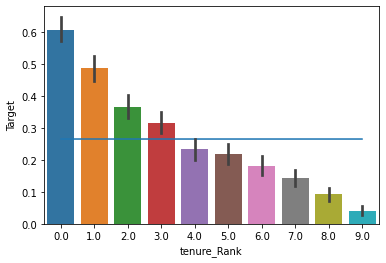

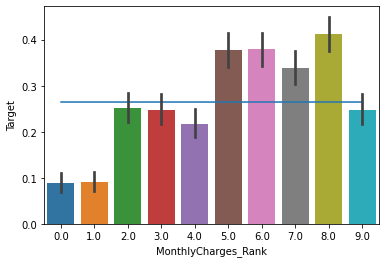

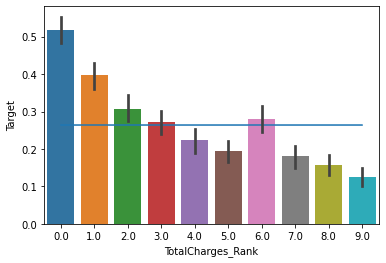

In [31]:
x_bin_combined = pd.concat([num_binned,y],axis=1,join='inner')
from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=x_bin_combined['Target'].mean(),data=x_bin_combined)
    sns.barplot(x=col, y="Target",data=x_bin_combined, estimator=mean )
plt.show()

In [32]:
select_features_df_num=num1
select_features_df_num.shape

(7043, 3)

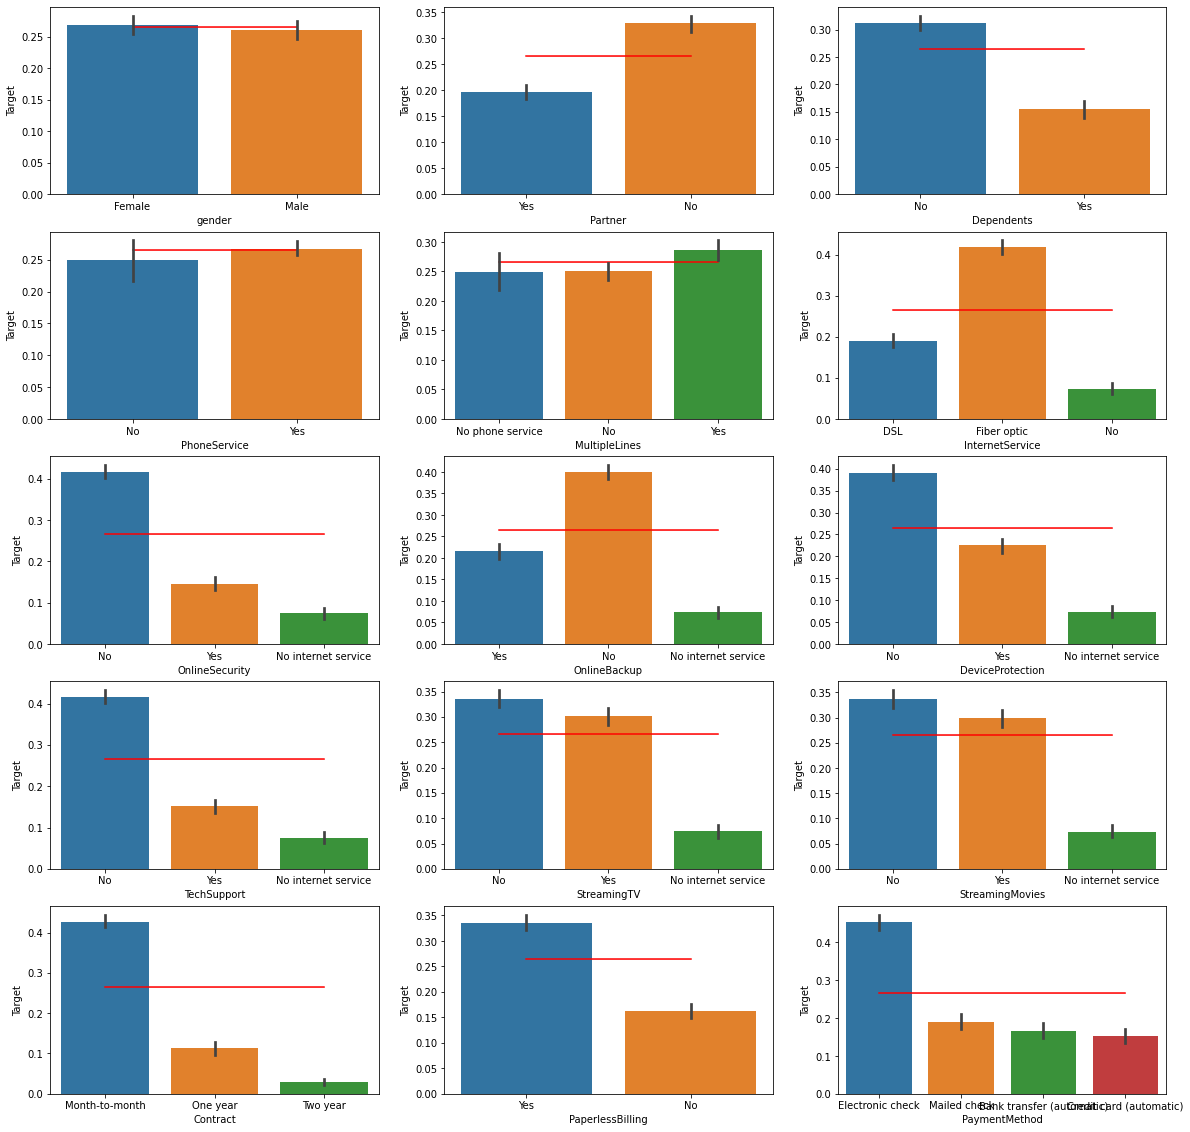

In [33]:
plt.figure(figsize=(20,20))
cat_y = pd.concat([cat,y],axis=1,join='inner')
len(list(cat_y.columns))-1
for i in enumerate(cat.columns):
    plt.subplot(5,3,i[0]+1)
    sns.lineplot(data=cat_y,x=i[1],y=cat_y['Target'].mean(),color='red')
    sns.barplot(data=cat_y,x=i[1],y='Target')

### In the above column as we can see 'Gender','Phoneservice','Multiplelines' are not able to distinguish the target variable so we will remove these columns

In [34]:
cat.drop(['gender','PhoneService','MultipleLines'],axis=1,inplace=True)

### Encoding the categorical variables

In [35]:
cat_dummy = pd.get_dummies(cat,drop_first=True)
cat_dummy.shape

(7043, 22)

### Selecting the best features

In [36]:
from sklearn.feature_selection import SelectKBest,chi2
kbest= SelectKBest(chi2, k=20)
kbest.fit_transform(cat_dummy,y)
cols = kbest.get_support(indices=True)
cat_best_features = cat_dummy.iloc[:,cols]

In [37]:
cat_best_features.shape

(7043, 20)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Target'>

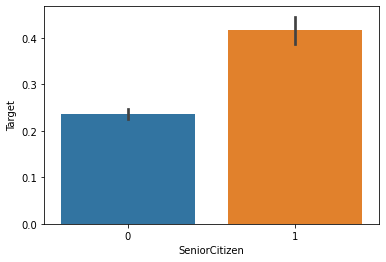

In [38]:
x_sen_cit = pd.concat([sen_cit,y],axis=1,join='inner')
sns.barplot(data=x_sen_cit,x='SeniorCitizen',y='Target')

### Concatenate all dataframes in single one

In [39]:
x_all=pd.concat([cat_best_features,sen_cit,select_features_df_num],axis=1,join="inner")

In [40]:
x_all.shape

(7043, 24)

### Train test split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_all,y,test_size=0.3,random_state=10)

In [42]:
print("Shape of Training Data",x_train.shape)
print("Shape of Testing Data",x_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data Target    0.266126
dtype: float64
Response Rate in Testing Data Target    0.263606
dtype: float64


### Model Building part

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [44]:
coeff_df=pd.DataFrame(x_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.010673
1,Dependents_Yes,-0.095012
2,InternetService_Fiber optic,0.598123
3,InternetService_No,-0.173241
4,OnlineSecurity_No internet service,-0.173241
5,OnlineSecurity_Yes,-0.616836
6,OnlineBackup_No internet service,-0.173241
7,OnlineBackup_Yes,-0.299833
8,DeviceProtection_No internet service,-0.173241
9,DeviceProtection_Yes,-0.019946


### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

### Hyperparameter tuning for decision tree

In [46]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(x_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [47]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

### Printing the decision tree

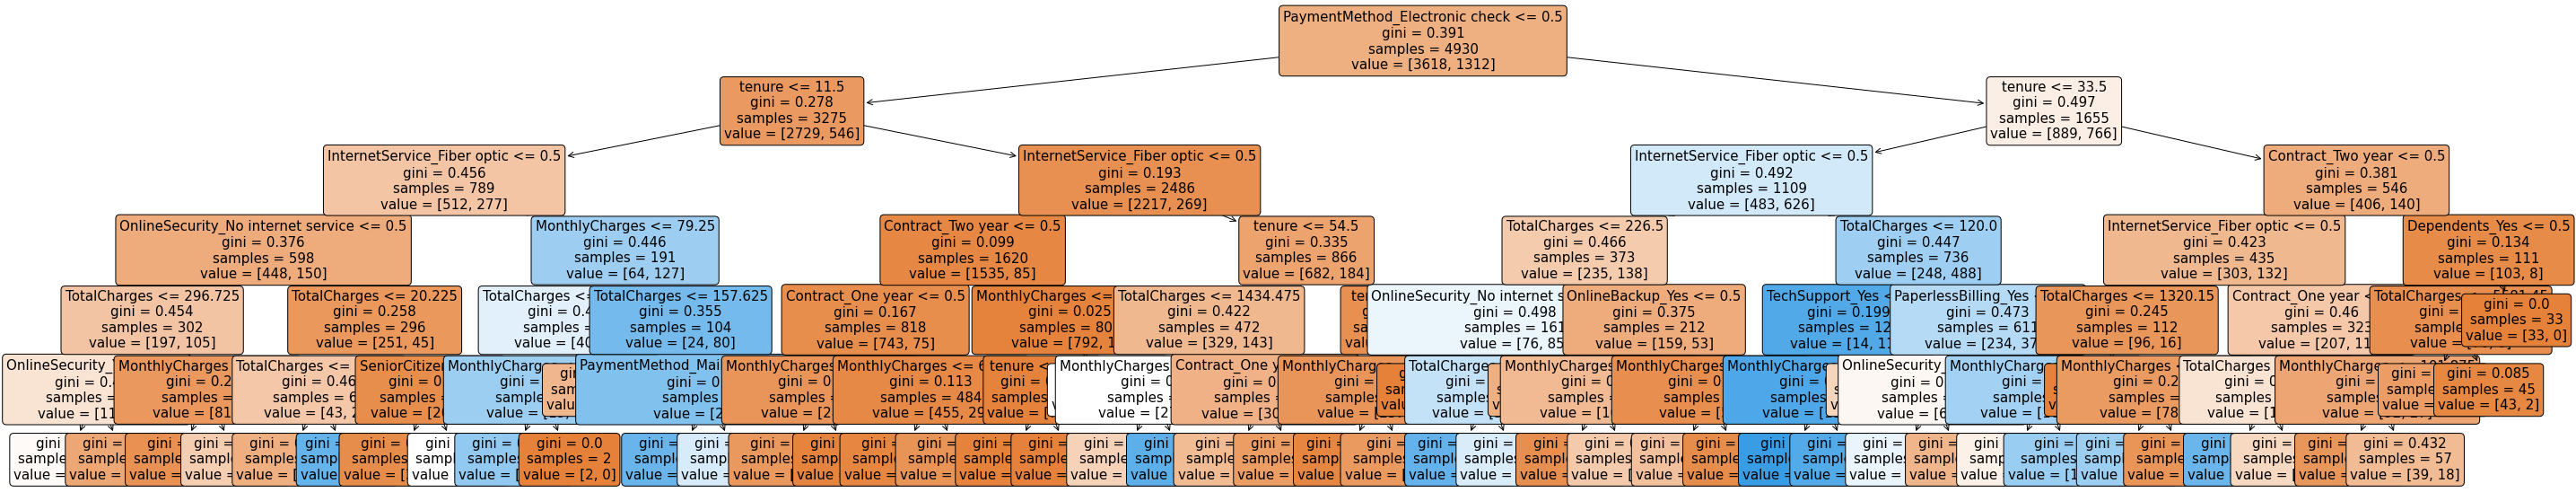

In [48]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=x_all.columns)
plt.show()

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [50]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.205037
TotalCharges,0.138474
InternetService_Fiber optic,0.107252
PaymentMethod_Electronic check,0.100813
Contract_Two year,0.077515
MonthlyCharges,0.077070
OnlineSecurity_Yes,0.047966
Contract_One year,0.036173
InternetService_No,0.030655
TechSupport_Yes,0.024361


### Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(x_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [52]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.207111
TotalCharges,0.182833
MonthlyCharges,0.170462
PaymentMethod_Electronic check,0.137353
InternetService_Fiber optic,0.132516
Contract_Two year,0.035272
Contract_One year,0.033817
PaperlessBilling_Yes,0.019569
OnlineSecurity_Yes,0.016303
TechSupport_Yes,0.012952


In [53]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

### Stacking Classifier

In [54]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [55]:
clf.fit(x_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [56]:
y_pred_logreg=logreg.predict(x_test)
y_pred_tree=dtree.predict(x_test)
y_pred_rf=rf.predict(x_test)
y_pred_gbm=gbm.predict(x_test)
y_pred_stacking=clf.predict(x_test)

In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [58]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.79649787032655
Precision 0.6365591397849463
Recall 0.5314183123877917
f1_score 0.5792563600782779


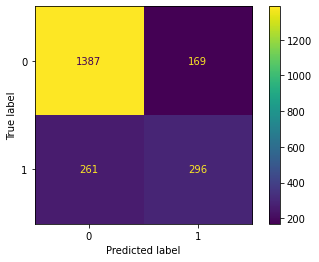

In [59]:
metrics.plot_confusion_matrix(logreg,x_test,y_test)

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7950780880265026
Precision 0.6455399061032864
Recall 0.49371633752244165
f1_score 0.5595116988809766


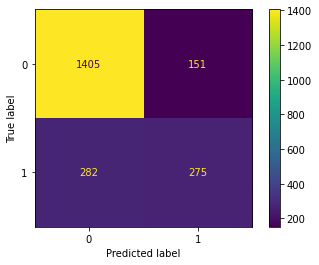

In [61]:
metrics.plot_confusion_matrix(dtree,x_test,y_test)

In [62]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.79649787032655
Precision 0.6599496221662469
Recall 0.4703770197486535
f1_score 0.549266247379455


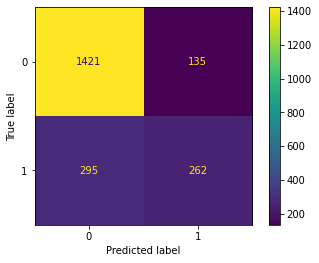

In [63]:
metrics.plot_confusion_matrix(rf,x_test,y_test)

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7979176526265973
Precision 0.6406926406926406
Recall 0.5314183123877917
f1_score 0.5809617271835132


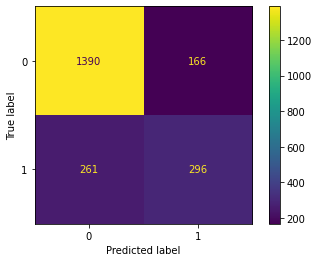

In [65]:
metrics.plot_confusion_matrix(gbm,x_test,y_test)

In [66]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.7988641741599621
Precision 0.652073732718894
Recall 0.5080789946140036
f1_score 0.5711402623612514


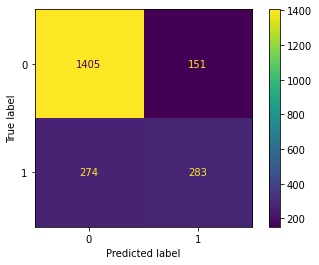

In [67]:
metrics.plot_confusion_matrix(clf,x_test,y_test)

### Hence Gradient Boosting is giving us the best result among all we will use that

In [68]:
y_pred_prob = gbm.predict_proba(x_all)[:, 1]
y_pred_prob

array([0.39084759, 0.04540237, 0.55766771, ..., 0.11937338, 0.69106785,
       0.04993798])

### Adding column which contains the probabilities of each record in the data

In [69]:
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target,pred_prob_gbm
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.390848
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.045402
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.557668
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.044852
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.666394


### Assigning each member a rank based on its probability of churning

In [74]:
df['P_Rank_gbm']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target,pred_prob_gbm,P_Rank_gbm
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.390848,8
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0.045402,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.557668,9
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.044852,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.666394,9


In [75]:
rank_df_actuals=df.groupby('P_Rank_gbm')['Target'].agg(['count','mean'])
rank_df_actuals

,count,mean
P_Rank_gbm,,
1,705,0.002837
2,704,0.008523
3,704,0.026989
4,704,0.034091
5,705,0.069504
6,704,0.167614
7,704,0.267045
8,704,0.494318
9,704,0.667614


In [76]:
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_actuals

,count,Actual_event_rate
P_Rank_gbm,,
1,705,0.002837
2,704,0.008523
3,704,0.026989
4,704,0.034091
5,705,0.069504
6,704,0.167614
7,704,0.267045
8,704,0.494318
9,704,0.667614


In [77]:
sorted_rank_df=rank_df_actuals.sort_values(by='P_Rank_gbm',ascending=False)
sorted_rank_df

,count,Actual_event_rate
P_Rank_gbm,,
10,705,0.914894
9,704,0.667614
8,704,0.494318
7,704,0.267045
6,704,0.167614
5,705,0.069504
4,704,0.034091
3,704,0.026989
2,704,0.008523


In [78]:
sorted_rank_df['N_events']=sorted_rank_df['count']*sorted_rank_df['Actual_event_rate']
sorted_rank_df

,count,Actual_event_rate,N_events
P_Rank_gbm,,,
10,705,0.914894,645.0
9,704,0.667614,470.0
8,704,0.494318,348.0
7,704,0.267045,188.0
6,704,0.167614,118.0
5,705,0.069504,49.0
4,704,0.034091,24.0
3,704,0.026989,19.0
2,704,0.008523,6.0


In [79]:
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df

,count,Actual_event_rate,N_events,cum_events
P_Rank_gbm,,,,
10,705,0.914894,645.0,645.0
9,704,0.667614,470.0,1115.0
8,704,0.494318,348.0,1463.0
7,704,0.267045,188.0,1651.0
6,704,0.167614,118.0,1769.0
5,705,0.069504,49.0,1818.0
4,704,0.034091,24.0,1842.0
3,704,0.026989,19.0,1861.0
2,704,0.008523,6.0,1867.0


In [80]:
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap
P_Rank_gbm,,,,,
10,705,0.914894,645.0,645.0,0.345104
9,704,0.667614,470.0,1115.0,0.251471
8,704,0.494318,348.0,1463.0,0.186196
7,704,0.267045,188.0,1651.0,0.100589
6,704,0.167614,118.0,1769.0,0.063135
5,705,0.069504,49.0,1818.0,0.026217
4,704,0.034091,24.0,1842.0,0.012841
3,704,0.026989,19.0,1861.0,0.010166
2,704,0.008523,6.0,1867.0,0.003210


In [81]:
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_gbm,,,,,,
10,705,0.914894,645.0,645.0,0.345104,0.345104
9,704,0.667614,470.0,1115.0,0.251471,0.596576
8,704,0.494318,348.0,1463.0,0.186196,0.782772
7,704,0.267045,188.0,1651.0,0.100589,0.883360
6,704,0.167614,118.0,1769.0,0.063135,0.946495
5,705,0.069504,49.0,1818.0,0.026217,0.972713
4,704,0.034091,24.0,1842.0,0.012841,0.985554
3,704,0.026989,19.0,1861.0,0.010166,0.995720
2,704,0.008523,6.0,1867.0,0.003210,0.998930


In [82]:
sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()
sorted_rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
P_Rank_gbm,,,,,,,,,,
10,705,0.914894,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596
9,704,0.667614,470.0,1115.0,0.251471,0.596576,234.0,294.0,0.045226,0.056823
8,704,0.494318,348.0,1463.0,0.186196,0.782772,356.0,650.0,0.068806,0.125628
7,704,0.267045,188.0,1651.0,0.100589,0.883360,516.0,1166.0,0.099729,0.225358
6,704,0.167614,118.0,1769.0,0.063135,0.946495,586.0,1752.0,0.113259,0.338616
5,705,0.069504,49.0,1818.0,0.026217,0.972713,656.0,2408.0,0.126788,0.465404
4,704,0.034091,24.0,1842.0,0.012841,0.985554,680.0,3088.0,0.131426,0.596830
3,704,0.026989,19.0,1861.0,0.010166,0.995720,685.0,3773.0,0.132393,0.729223
2,704,0.008523,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128


In [83]:
sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)
sorted_rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS
P_Rank_gbm,,,,,,,,,,,
10,705,0.914894,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335
9,704,0.667614,470.0,1115.0,0.251471,0.596576,234.0,294.0,0.045226,0.056823,0.5398
8,704,0.494318,348.0,1463.0,0.186196,0.782772,356.0,650.0,0.068806,0.125628,0.6571
7,704,0.267045,188.0,1651.0,0.100589,0.883360,516.0,1166.0,0.099729,0.225358,0.6580
6,704,0.167614,118.0,1769.0,0.063135,0.946495,586.0,1752.0,0.113259,0.338616,0.6079
5,705,0.069504,49.0,1818.0,0.026217,0.972713,656.0,2408.0,0.126788,0.465404,0.5073
4,704,0.034091,24.0,1842.0,0.012841,0.985554,680.0,3088.0,0.131426,0.596830,0.3887
3,704,0.026989,19.0,1861.0,0.010166,0.995720,685.0,3773.0,0.132393,0.729223,0.2665
2,704,0.008523,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348


In [84]:
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS
0,10,705,0.914894,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335
1,9,704,0.667614,470.0,1115.0,0.251471,0.596576,234.0,294.0,0.045226,0.056823,0.5398
2,8,704,0.494318,348.0,1463.0,0.186196,0.782772,356.0,650.0,0.068806,0.125628,0.6571
3,7,704,0.267045,188.0,1651.0,0.100589,0.883360,516.0,1166.0,0.099729,0.225358,0.6580
4,6,704,0.167614,118.0,1769.0,0.063135,0.946495,586.0,1752.0,0.113259,0.338616,0.6079
5,5,705,0.069504,49.0,1818.0,0.026217,0.972713,656.0,2408.0,0.126788,0.465404,0.5073
6,4,704,0.034091,24.0,1842.0,0.012841,0.985554,680.0,3088.0,0.131426,0.596830,0.3887
7,3,704,0.026989,19.0,1861.0,0.010166,0.995720,685.0,3773.0,0.132393,0.729223,0.2665
8,2,704,0.008523,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348
9,1,705,0.002837,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,-0.0000


In [85]:
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Decile
0,10,705,0.914894,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335,1
1,9,704,0.667614,470.0,1115.0,0.251471,0.596576,234.0,294.0,0.045226,0.056823,0.5398,2
2,8,704,0.494318,348.0,1463.0,0.186196,0.782772,356.0,650.0,0.068806,0.125628,0.6571,3
3,7,704,0.267045,188.0,1651.0,0.100589,0.883360,516.0,1166.0,0.099729,0.225358,0.6580,4
4,6,704,0.167614,118.0,1769.0,0.063135,0.946495,586.0,1752.0,0.113259,0.338616,0.6079,5
5,5,705,0.069504,49.0,1818.0,0.026217,0.972713,656.0,2408.0,0.126788,0.465404,0.5073,6
6,4,704,0.034091,24.0,1842.0,0.012841,0.985554,680.0,3088.0,0.131426,0.596830,0.3887,7
7,3,704,0.026989,19.0,1861.0,0.010166,0.995720,685.0,3773.0,0.132393,0.729223,0.2665,8
8,2,704,0.008523,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348,9
9,1,705,0.002837,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,-0.0000,10


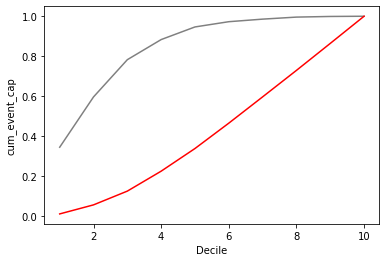

In [86]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=sorted_reindexed,color='red')

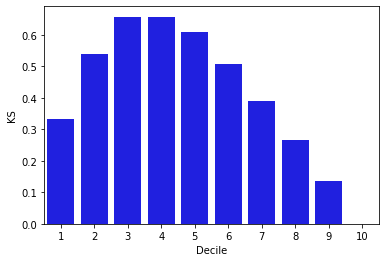

In [87]:
ax = sns.barplot( x="Decile", y="KS", data=sorted_reindexed,color='blue')

In [88]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target,pred_prob_gbm,P_Rank_gbm,Tenure_Rank
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.390848,8,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,0,0.045402,3,6
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.557668,9,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.044852,3,7
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.666394,9,1


In [89]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [90]:
df['tenure'].mean()

32.37114865824223

In [91]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target,pred_prob_gbm,P_Rank_gbm,Tenure_Rank,Tenure_Segment
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.390848,8,1,Low Tenure
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,0,0.045402,3,6,Low Tenure
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.557668,9,1,Low Tenure
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.044852,3,7,High Tenure
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.666394,9,1,Low Tenure


In [92]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [93]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [94]:
df['MonthlyCharges'].mean()

64.76169246059918

In [95]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")

In [96]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_gbm']>=7,"Top 4","Bottom 6")

In [97]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Target,pred_prob_gbm,P_Rank_gbm,Tenure_Rank,Tenure_Segment,MonthlyCharges_Rank,Monthly_Charge_Segment,Predicted_Churn_Rank
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,0,0.390848,8,1,Low Tenure,3,Low Charges,Top 4
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,0,0.045402,3,6,Low Tenure,4,Low Charges,Bottom 6
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,1,0.557668,9,1,Low Tenure,4,Low Charges,Top 4
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,0,0.044852,3,7,High Tenure,3,Low Charges,Bottom 6
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,1,0.666394,9,1,Low Tenure,6,High Charges,Top 4


In [98]:
df_top4=df.loc[df['Predicted_Churn_Rank']=='Top 4',:]

In [99]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']

In [100]:
df_top4_services=df_top4[service_list]

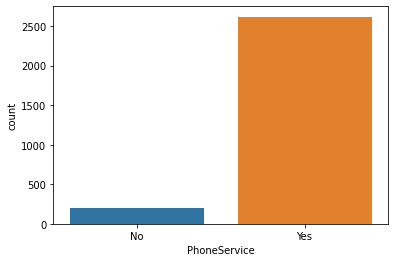

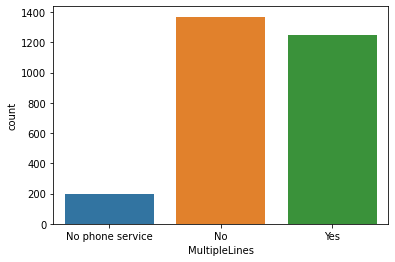

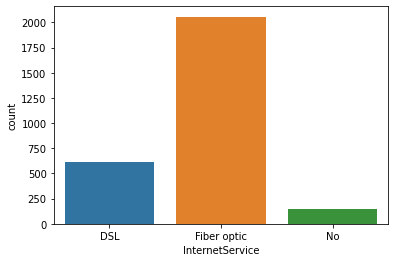

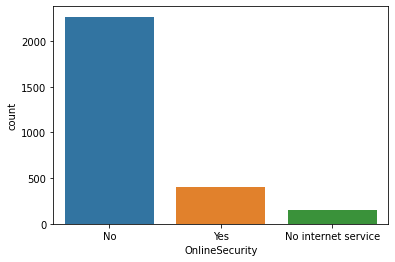

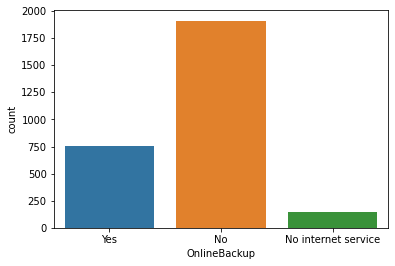

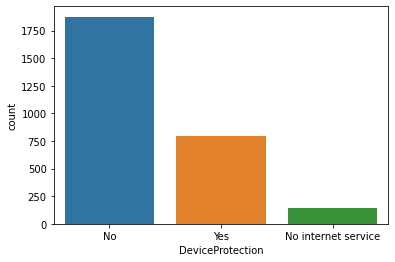

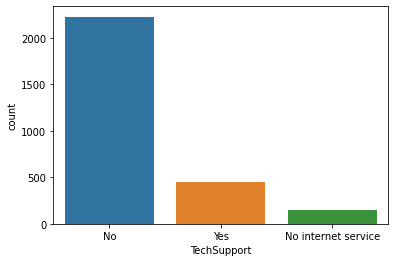

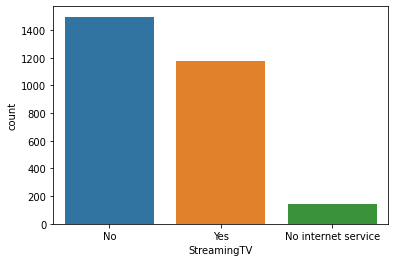

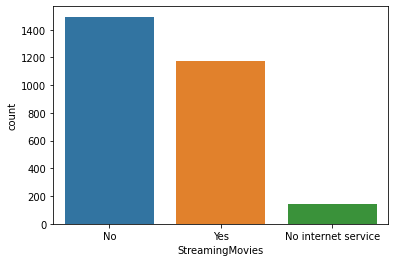

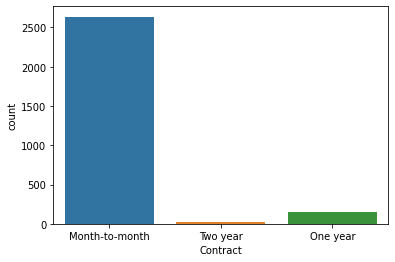

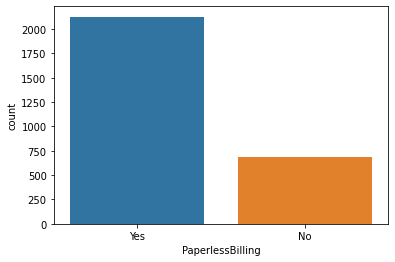

In [101]:
for col in (df_top4_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top4_services)
plt.show()